<a href="https://colab.research.google.com/github/Taehun88/2022F-Ajou-ML/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HW3 :: Parameter Tuning and Classifcation**

## 코랩과 구글 드라이브 연동 OR 로컬에서 파일 업로드
- 해당 섹션 코드 수정 가능

In [1]:
# 연동 OR 파일 업로드
# 연동 시 path 설정 주의

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive

Mounted at /content/drive
/content/drive/MyDrive


## 데이터 불러오기

In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('airline_sampled2.csv') 
# HW1에서 사용한 데이터를 샘플링한 파일이므로 꼭 제공된 csv 파일을 사용할 것

In [5]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,8827,8858,0,1,27,1,2,183,4,4,...,5,4,3,4,3,4,5,0,7.0,0
1,3588,3601,1,0,22,1,0,829,2,3,...,1,1,3,3,3,3,1,4,4.0,0
2,1011,1017,0,0,23,1,2,1020,4,5,...,4,3,4,5,3,5,4,0,0.0,1
3,7212,7237,1,0,21,1,0,1028,4,4,...,3,3,3,2,5,4,3,0,0.0,1
4,5025,5044,1,1,67,0,0,626,3,4,...,2,2,3,2,5,2,3,0,0.0,0


## 데이터 나누기

### **주의 사항**
train_test_split에 random seed를 사용하여 split set을 고정한다.
- 모든 문제에 같은 random seed를 부여할 필요는 없다.


In [6]:
from sklearn.model_selection import train_test_split

X = df.drop('satisfaction', axis=1)
y = df['satisfaction']
y=y.astype('int')
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9)

print("X_train's shape : ", X_train.shape)
print("y_train's shape : ", y_train.shape)
print("\nX_val's shape : ", X_val.shape)
print("y_val's shape : ", y_val.shape)
print("\nX_test's shape : ", X_test.shape)
print("y_test's shape : ", y_test.shape)

X_train's shape :  (800, 24)
y_train's shape :  (800,)

X_val's shape :  (100, 24)
y_val's shape :  (100,)

X_test's shape :  (100, 24)
y_test's shape :  (100,)


## 문제1 KNN



- Scikit-learn 라이브러리를 이용하여 KNN의 최적의 파라미터를 찾는다.
    - 최근접 이웃을 찾기 위한 거리의 종류로 최소한 두 가지 이상의 거리 척도를 사용한다.
    - K값을 최소 3개 이상 비교한다.
    - 거리 척도, k값에 따라 train, validation 정확도를 한 그래프로 그린다.(x축 k값, y축 정확도)
    - 찾은 최적의 파라미터와 test set 이용하여 test_accuracy 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.



In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

0.9


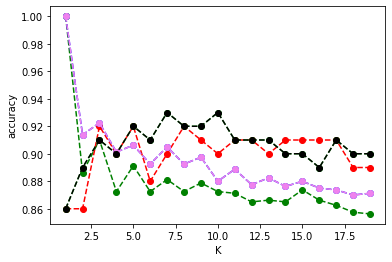

In [8]:
### 문제 1 ###

def Min_Max_Scaling(lst):
  normalized = []
  for i in lst:
    normal = (i - min(lst)) / (max(lst) - min(lst))
    normalized.append(normal)

  return normalized

col = X_train.columns

for i in col:
  X_train[i] = Min_Max_Scaling(X_train[i])
  X_val[i] = Min_Max_Scaling(X_val[i])
  X_test[i] = Min_Max_Scaling(X_test[i])


K = range(1, 20)
train_acc = []
val_acc = []
train_acc_2 = []
val_acc_2 = []
train_acc_3 = []
val_acc_3 = []

for i in K:
  KNNclassifier_name = KNeighborsClassifier(n_neighbors = i, metric = 'euclidean')
  KNNclassifier_name.fit(X_train, y_train)
  train_acc.append(KNNclassifier_name.score(X_train, y_train))
  val_acc.append(KNNclassifier_name.score(X_val, y_val))
  KNN_2 = KNeighborsClassifier(n_neighbors = i, metric = 'manhattan')
  KNN_2.fit(X_train, y_train)
  train_acc_2.append(KNN_2.score(X_train, y_train))
  val_acc_2.append(KNN_2.score(X_val, y_val))
  KNN_3 = KNeighborsClassifier(n_neighbors = i, metric = 'cosine')
  KNN_3.fit(X_train, y_train)
  train_acc_3.append(KNN_2.score(X_train, y_train))
  val_acc_3.append(KNN_2.score(X_val, y_val))

plt.figure()
plt.plot(K, train_acc, label='train accuracy', color = 'g', marker = 'o', linestyle='--')
plt.plot(K, val_acc, label='validation accuracy', color = 'r', marker = 'o', linestyle='--')
plt.plot(K, train_acc_2, label='train accuracy2', color = 'b', marker='o', linestyle='--')
plt.plot(K, val_acc_2, label='validation accuracy2', color = 'limegreen', marker='o',linestyle='--')
plt.plot(K, train_acc_3, label='train accuracy3', color = 'violet', marker='o', linestyle='--')
plt.plot(K, val_acc_3, label='validation accuracy3', color = 'black', marker='o',linestyle='--')
plt.xlabel('K')
plt.ylabel('accuracy')

KNN_test = KNeighborsClassifier(n_neighbors = 17, metric = 'euclidean')
KNN_test.fit(X_train, y_train)
test_acc = KNN_test.score(X_test, y_test)
print(test_acc)
### 코드 작성 ###

**설명 작성**  
- 최적의 파라미터: distance metric: Euclidean, K=17
- 설명: 거리척도로 Eculidean, Manhattan, cosine를 사용 했을때, Test accuracy는 cosine가 제일 높은 수치를 기록하나, Graph의 모양상 Underfitting을 의심해야한다. 따라서 최적화된 거리척도는 Eculidean이고, Graph에서 Train accuracy와 Validation accuracy가 일정한 모습을 그리고 있는 15이상의 값 중, 17이 제일 최적화 된 값이다. (test accuracy: 0.84)

---

## 문제2 Random Forest


- Scikit-learn 라이브러리를 이용하여 Random Forest의 최적의 파라미터를 찾는다.
    - Criterion 중 최소 두개를 비교한다.
    - 최적의 파라미터 max depth 값을 찾는다.
    - 파라미터에 따라 train, validation 정확도를 한 그래프로 그린다.(x축 max depth 값, y축 정확도)
    - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

In [9]:
from sklearn.ensemble import RandomForestClassifier

0.91


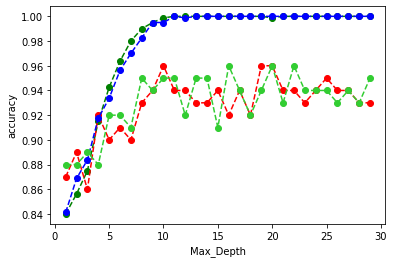

In [10]:
### 문제 2 ###
max_depth_list = range(1,30)

gini_train_acc = []
gini_val_acc = []
entropy_train_acc = []
entropy_val_acc = []
log_loss_train_acc = []
log_loss_val_acc = []

for i in max_depth_list:
  ran_1 = RandomForestClassifier(criterion='gini', max_depth=i)
  ran_2 = RandomForestClassifier(criterion='entropy', max_depth=i)
  
  ran_1.fit(X_train, y_train)
  ran_2.fit(X_train, y_train)
  
  gini_train_acc.append(ran_1.score(X_train, y_train))
  gini_val_acc.append(ran_1.score(X_val, y_val))
  entropy_train_acc.append(ran_2.score(X_train, y_train))
  entropy_val_acc.append(ran_2.score(X_val, y_val))


plt.figure()
plt.plot(max_depth_list, gini_train_acc, label='train accuracy', color = 'g', marker = 'o', linestyle='--')
plt.plot(max_depth_list, gini_val_acc, label='validation accuracy', color = 'r', marker = 'o', linestyle='--')
plt.plot(max_depth_list, entropy_train_acc, label='train accuracy2', color = 'b', marker='o', linestyle='--')
plt.plot(max_depth_list, entropy_val_acc, label='validation accuracy2', color = 'limegreen', marker='o',linestyle='--')
plt.xlabel('Max_Depth')
plt.ylabel('accuracy')
test_class = RandomForestClassifier(criterion='gini', max_depth=12)
test_class.fit(X_train, y_train)
print(test_class.score(X_test, y_test))
### 코드 작성 ###

**설명 작성**  
- 최적의 파라미터:Gini Criterion, Max_depth = 12
- 설명: test accuracy가 1에 가까울 경우, Overfitting일 가능성이 높으므로, 1에 근접하며, 정확도가 가장 높은 경우가 gini, 12일 경우이므로 최적화된 hyperparameter이라고 생각된다. (test accuracy = 0.93)

---

## 문제3 Cross validation with Linear SVM
### 3-1: k-fold
- 수업시간에 배운 **5-fold** 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 linear SVM 모델의 파라미터 C를 cross-validation을 바탕으로 최적화한다.
    - **5-fold CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
    - 파라미터에 따라 K-fold CV를 통해 나온 평균 정확도와 각 fold의 정확도들을 한 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
    - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

### 3-2: Leave One Out
- 수업시간에 배운 Leave-One-Out 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 linear SVM 모델의 파라미터 C를 cross-validation을 바탕으로 최적화한다.
  - **Leave-One-Out CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
  - 파라미터에 따라 Leave-One-Out CV를 통해 나온 평균 정확도를 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
  - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
  - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

0.83


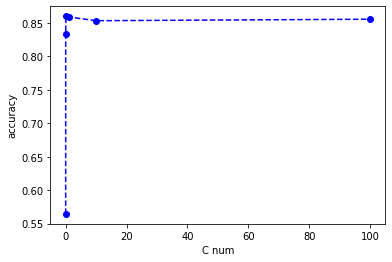

In [14]:
### 문제 3-1 ###
import sklearn.svm as svm
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1, random_state = 1)

col = X_train.columns

for i in col:
  X_train[i] = Min_Max_Scaling(X_train[i])
  X_val[i] = Min_Max_Scaling(X_val[i])
  X_test[i] = Min_Max_Scaling(X_test[i])

C_list = [0.001,0.01,0.1,1,10,100]

sig_list = []

for i in  C_list:
  svm_clf_sig = svm.SVC(C = i, kernel='linear')

  sig_list.append(np.mean(cross_val_score(svm_clf_sig, X_train, y_train, cv = 5)))

plt.figure()
plt.plot(C_list, sig_list, label='accuracy', color = 'b', marker='o', linestyle='--')
plt.xlabel('C num')
plt.ylabel('accuracy')
test_clf = svm.SVC(C = 10, kernel = 'linear')
test_clf.fit(X_train, y_train)
print(test_clf.score(X_test, y_test))
### 코드 작성 ###

**설명 작성**  
- 최적의 파라미터:C = 10
- 설명: 위의 그래프에서 0.001의 경우 정확도가 현저히 낮은 것을 볼수 있으며 이후 증가하다가 감소하는 형태를 보인다. 이때 감소의 이유는 Underfitting이라고 볼 수 있으며, Underfitting이 된 부분을 제외한 C = 10일때 최적화라고 확인이 가능하다.

0.82


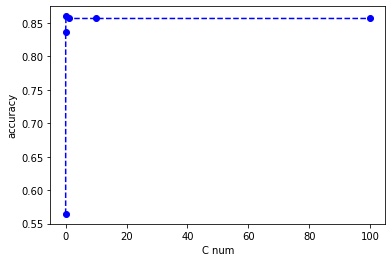

In [15]:
### 문제 3-2 ###
import sklearn.svm as svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1, random_state = 1)

col = X_train.columns

for i in col:
  X_train[i] = Min_Max_Scaling(X_train[i])
  X_val[i] = Min_Max_Scaling(X_val[i])
  X_test[i] = Min_Max_Scaling(X_test[i])

C_list = [0.001,0.01,0.1,1,10,100]
sig_list = []
cv_loocv = LeaveOneOut()
for i in  C_list:
  svm_clf_sig = svm.SVC(C = i, kernel='linear')

  sig_list.append(np.mean(cross_val_score(svm_clf_sig, X_train, y_train, cv = cv_loocv)))

plt.figure()
plt.plot(C_list, sig_list, label='accuracy', color = 'b', marker='o', linestyle='--')
plt.xlabel('C num')
plt.ylabel('accuracy')
test_clf = svm.SVC(C = 1, kernel = 'linear')
test_clf.fit(X_train, y_train)
print(test_clf.score(X_test, y_test))
### 코드 작성 ###

**설명 작성**  
- 최적의 파라미터:C = 1
- 설명:그래프의 양상에서 정확도가 떨어지는 이유는 Underfitting을 의심할 수 있고 떨어진 그래프가 올라가는건 Overfitting을 의심이 가능하다. 그래서 C값이 가장 높으면서 Stable한 값이 C = 1인것을 확인했고 해당 값이 최적화 된 값이라고 생각했다.

---

## 문제4 Regression
문제 4 에서는 캘리포니아 주택 가격 데이터셋을 사용합니다.   
학습을 통해 주택 가격을 예측하는 문제입니다.  
데이터에 대한 자세한 설명은 아래 코드의 description을 참고해주세요.

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.DESCR)

In [ ]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['target'] = housing.target

In [ ]:
print(df.head())

In [ ]:
print(df.shape) #(20640, 9)
print(df.describe())

### 문제 4-1 : Adjusted R2 Score
- sklearn.metrics 패키지를 사용하여 ```def adjr2```에 Adjusted R2 Score를 구하는 함수를 작성한다.
- ```def r2```를 사용하여 ```adjr2```를 구현한다.
- 코드 작성 영역 이외의 코드를 수정하지 않는다.
- 주어진 함수 파라미터를 사용하여 구현한다.

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
import numpy as np

def r2(actual, predicted):
    """ R2 Score """
    return r2_score(actual, predicted)

###################################
def adjr2(actual, predicted, rowcount, featurecount):
############ 문제 4-1 ##############
    """ Adjusted R2 Score """
    square_r = r2(actual, predicted)
    adj_r2 = 1-(((rowcount-1) / (rowcount - featurecount - 1)) * square_r)
    return adj_r2
####################################
####################################

### 문제 4-2 : Feature Selection
- sklearn 패키지를 사용하여 feature selection을 수행하는 함수 ```forward_selection```을 구현한다.
- Linear Regressor 을 사용하여 feature selection이 어떻게 달라지는 지 관찰한다.
- 코드 작성 영역 이외의 코드를 수정하지 않는다.
- 주어진 변수들, 자료들을 최대한 활용하여 코드를 작성한다.

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd

In [ ]:
X = df.drop(columns=['target'])
y = df['target']
y=y.astype('int')
print(X.shape)
print(y.shape)

In [ ]:
def forward_selection(X, y): # X: train data, y: train data's target
    initial_list = []
    included = list(initial_list) # 포함되어야 하는 feature
    best_r2 = 0 # 가장 높은 r2 score를 저장

    while True:

        changed = False # while 문을 빠져나가는 조건으로 활용
        excluded = list(set(X.columns)-set(included)) # included list에 없는 column names 저장하는 리스트
        new_scores = dict.fromkeys(excluded)

        for new_column in excluded:
          
          model = LinearRegression()

          ###########################################
          ###### 코드 작성 영역 외 수정 하지 말 것 #########
          ################ 문제 4-2 ##################
          train_feature = included[:]

          train_feature.append(new_column)

          model.fit(X[train_feature],y)
          
          new_scores[new_column] = adjr2(y,model.predict(X[train_feature]), X.shape[0], len(train_feature))
        
        sorted_scores = sorted(new_scores.items(), key=lambda x: x[1], reverse=True)

        now_best = sorted_scores[0][1]

        if now_best > best_r2:
          changed = True
          best_r2 = now_best
          included.append(sorted_scores[0][0])
        else:
          break
        
        ##############################################
        ##############################################
 
    return included

selected_features = forward_selection(X, y)
print('selected_features:', selected_features)

### 문제 4-3: Regularized Model
- Scikit-learn 라이브러리를 사용하여 Ridge Regression과 Lasso Regression 모델을 만든다.
- train : validation : test **데이터셋의 비율을 8:1:1**로 설정한다.
- 문제 4-1의 **forward selection을 통해 얻은 feature만**을 가진 데이터를 사용한다.
- 다양한 alpha 값에 대해 validation dataset을 사용하여 각 모델에 대한 **최적의 alpha 값을 찾고 찾은 최적의 alpha 값을 텍스트 셀에 작성**한다.
- alpha 값은 아래의 리스트를 사용한다.  
```alpha = [0.0001, 0.001,0.01,0.1,1,10, 100, 1000, 10000, 100000]```
- alpha 값에 대한 R2 score의 변화를 그래프로 나타낸다.
  * **x축: alpha 값**
  * **y축: R2 score 값**
  * 파란색 선: Ridge 결과, 빨간색 선: Lasso 결과
  * 그래프에 **legend**가 포함되어 있어야 한다. 
- **train과 validation dataset을 합하여 train set을 만든 후 최종 학습 결과를 도출**한다.
  * 최적의 alpha 값을 찾을 때 사용한 test set은 변하지 않는다. 
  * r2 score를 사용하여 train set에 대한 prediction 결과와 test set에 대한 prediction 결과를 구해 print 한다.

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score
import numpy as np

In [ ]:
### 문제 4-3 ###

### 코드 작성 ###

In [ ]:
### 문제 4-3 ###

### 그래프 작성 ###

- Rridge regression 모델 최적의 alpha 값:
- Lasso regression 모델 최적의 alpha 값:

In [ ]:
# 최종 결과 출력